### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [49]:
import pandas as pd
df = pd.read_table('Twitter-Absolute-Sigma-500.data',sep=',',header=None)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


### Getting the unique values in the last column
### This suggests that this is the classification data set with true, false value for the buzz

In [51]:

df[77].unique()

array([1., 0.])

We do not see any missing values

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
0     140707 non-null int64
1     140707 non-null int64
2     140707 non-null int64
3     140707 non-null int64
4     140707 non-null int64
5     140707 non-null int64
6     140707 non-null int64
7     140707 non-null int64
8     140707 non-null int64
9     140707 non-null int64
10    140707 non-null int64
11    140707 non-null int64
12    140707 non-null int64
13    140707 non-null int64
14    140707 non-null float64
15    140707 non-null float64
16    140707 non-null float64
17    140707 non-null float64
18    140707 non-null float64
19    140707 non-null float64
20    140707 non-null float64
21    140707 non-null float64
22    140707 non-null float64
23    140707 non-null float64
24    140707 non-null float64
25    140707 non-null float64
26    140707 non-null float64
27    140707 non-null float64
28    140707 non-null int64
29    140707 non-null int64
30    140707 non-null

In [53]:
#looks like we have an imbalamced data set

df[77].value_counts()

0.0    112932
1.0     27775
Name: 77, dtype: int64

In [54]:
df.shape

(140707, 78)

In [55]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [56]:
sample_df = df.sample(frac=0.1,random_state=6)

In [57]:
sample_df

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
108152,3,5,9,7,9,9,8,4,4,8,...,1.000000,1.000000,3,5,9,7,9,9,8,0.0
119230,0,1,0,3,0,1,0,0,1,0,...,1.000000,0.000000,0,1,0,3,0,1,0,0.0
16239,543,625,666,641,550,711,854,220,300,362,...,1.000000,1.000000,543,625,666,641,550,711,854,1.0
86330,0,2,0,1,1,1,2,0,2,0,...,1.000000,1.000000,0,2,0,1,1,1,2,0.0
83376,100,103,90,90,90,128,158,54,72,70,...,1.000000,1.000000,100,103,90,90,90,128,158,0.0
30484,4,7,13,1,7,3,9,1,1,1,...,1.000000,1.111111,4,7,13,1,7,3,9,0.0
101286,14,16,9,10,11,26,25,11,16,9,...,1.000000,1.000000,14,16,9,10,11,26,25,0.0
126585,901,915,814,485,580,955,1044,252,248,197,...,1.245303,1.252863,904,923,818,487,586,958,1048,1.0
86550,5,6,5,8,0,5,12,6,5,9,...,1.000000,4.583333,5,6,5,9,0,5,12,0.0
82706,6,9,6,5,4,11,6,1,3,2,...,1.000000,1.166667,6,9,6,5,4,11,6,0.0


In [58]:
X = sample_df.iloc[:,:77]
y = sample_df[77]

In [59]:
X

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
108152,3,5,9,7,9,9,8,4,4,8,...,1.000000,1.000000,1.000000,3,5,9,7,9,9,8
119230,0,1,0,3,0,1,0,0,1,0,...,0.000000,1.000000,0.000000,0,1,0,3,0,1,0
16239,543,625,666,641,550,711,854,220,300,362,...,1.000000,1.000000,1.000000,543,625,666,641,550,711,854
86330,0,2,0,1,1,1,2,0,2,0,...,1.000000,1.000000,1.000000,0,2,0,1,1,1,2
83376,100,103,90,90,90,128,158,54,72,70,...,1.000000,1.000000,1.000000,100,103,90,90,90,128,158
30484,4,7,13,1,7,3,9,1,1,1,...,1.428571,1.000000,1.111111,4,7,13,1,7,3,9
101286,14,16,9,10,11,26,25,11,16,9,...,1.000000,1.000000,1.000000,14,16,9,10,11,26,25
126585,901,915,814,485,580,955,1044,252,248,197,...,1.116041,1.245303,1.252863,904,923,818,487,586,958,1048
86550,5,6,5,8,0,5,12,6,5,9,...,0.000000,1.000000,4.583333,5,6,5,9,0,5,12
82706,6,9,6,5,4,11,6,1,3,2,...,1.000000,1.000000,1.166667,6,9,6,5,4,11,6


In [60]:
y

108152    0.0
119230    0.0
16239     1.0
86330     0.0
83376     0.0
30484     0.0
101286    0.0
126585    1.0
86550     0.0
82706     0.0
57005     1.0
38929     0.0
2569      1.0
107286    1.0
24622     0.0
86813     1.0
123892    0.0
43762     0.0
104069    1.0
60097     1.0
42580     1.0
134703    0.0
46461     0.0
54329     0.0
19499     0.0
89895     0.0
78588     0.0
93358     0.0
67030     0.0
14701     0.0
         ... 
52050     0.0
20756     0.0
11451     0.0
102322    1.0
82383     1.0
109203    0.0
26764     0.0
98855     0.0
104677    0.0
99496     0.0
9588      1.0
116331    0.0
138867    1.0
43133     0.0
37617     0.0
95702     0.0
124421    1.0
14444     0.0
17610     0.0
48204     0.0
80289     0.0
102319    1.0
42799     1.0
118144    0.0
53352     0.0
94556     0.0
64510     0.0
409       0.0
93784     1.0
117070    0.0
Name: 77, Length: 14071, dtype: float64

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
import mglearn
from sklearn import svm, grid_search
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline

In [62]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=6)
sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [63]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10553, 77) (3518, 77) (10553,) (3518,)


## Marking the baseline

In [64]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [0.]
Test score: 0.79


In [71]:
knn = KNeighborsClassifier()
#param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25, 30, 35, 40, 45]}
scoring = {'AUC': 'roc_auc', 'Recall': 'recall', 'Precision': 'precision'}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring=scoring, refit='AUC')
grid_knn.fit(X_train, y_train)
grid_knn.score(X_train, y_train)

0.9932799149916951

In [72]:
results = grid_knn.cv_results_
results

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\skl

{'mean_fit_time': array([0.07640266, 0.06562653, 0.06323175, 0.0728302 , 0.06902475,
        0.07421422, 0.06682768, 0.06382794, 0.06183181, 0.0616385 ]),
 'mean_score_time': array([2.80768309, 3.14996295, 3.24153752, 3.67198162, 4.09178538,
        4.25104089, 4.44529638, 4.09923706, 4.03781443, 4.32325001]),
 'mean_test_AUC': array([0.91996971, 0.97335654, 0.98289867, 0.9857337 , 0.98683545,
        0.98818839, 0.98856601, 0.98902855, 0.98905465, 0.9889967 ]),
 'mean_test_Precision': array([0.88143418, 0.91832689, 0.93064393, 0.92291479, 0.92959115,
        0.92572484, 0.92737772, 0.9265998 , 0.92958821, 0.93070302]),
 'mean_test_Recall': array([0.86919445, 0.88388536, 0.87108807, 0.87819685, 0.87440713,
        0.8781982 , 0.8696669 , 0.8772497 , 0.87393221, 0.8763021 ]),
 'mean_train_AUC': array([1.        , 0.99626373, 0.99492236, 0.99425964, 0.99390357,
        0.99363882, 0.9934553 , 0.99330591, 0.9931277 , 0.99298076]),
 'mean_train_Precision': array([1.        , 0.93855708, 0.

In [73]:
grid_knn.score(X_test, y_test)

0.9911983315751822

In [74]:
grid_knn.best_params_

{'n_neighbors': 40}

In [75]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn

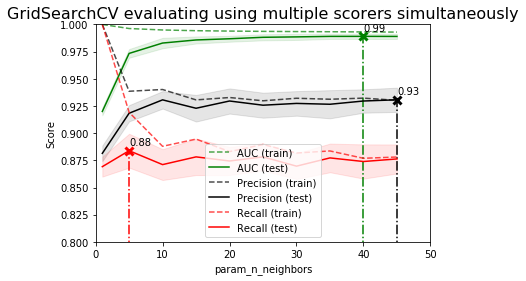

In [76]:
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("param_n_neighbors")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 50)
ax.set_ylim(0.80, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k', 'r']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [79]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [80]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.96 


In [161]:
Titles = ['Model', 'Best Parameter', 'ROC_AUC Train Score', 'ROC_AUC Test Score']
knn_report = [['KNN', grid_knn.best_params_, roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test)]]
pd.DataFrame(knn_report, columns=Titles)

,Model,Best Parameter,ROC_AUC Train Score,ROC_AUC Test Score
0,KNN,{'n_neighbors': 40},0.951486,0.960395


Logistic Regression

In [81]:
logistic = linear_model.LogisticRegression()

In [82]:
scoring = {'AUC': 'roc_auc', 'Recall': 'recall', 'Precision': 'precision'}
penalty = ['l1', 'l2']
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hyperparameters = dict(C=c_range, penalty=penalty)

grid_lr = GridSearchCV(logistic, cv=5, verbose=0, scoring=scoring, param_grid=hyperparameters, refit='AUC')
grid_lr.fit(X_train, y_train)
grid_lr.score(X_train, y_train)

0.9934343658309723

In [83]:
grid_lr.score(X_test, y_test)

0.9934199071211184

In [84]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [85]:
grid_lr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
y_lr_predict = grid_lr.predict(X_test)
y_lr_train_predict = grid_lr.predict(X_train)

In [87]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_lr_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_lr_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.97 


In [122]:
results = grid_lr.cv_results_
pd.DataFrame(results)

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\skl

,mean_fit_time,mean_score_time,mean_test_AUC,mean_test_Precision,mean_test_Recall,mean_train_AUC,mean_train_Precision,mean_train_Recall,param_C,param_penalty,...,split4_train_Precision,split4_train_Recall,std_fit_time,std_score_time,std_test_AUC,std_test_Precision,std_test_Recall,std_train_AUC,std_train_Precision,std_train_Recall
0,0.050073,0.003184,0.982206,0.967521,0.447865,0.982227,0.968494,0.447986,0.001,l1,...,0.962677,0.443128,0.003192,0.000403,0.003357,0.012730,0.015790,0.000556,0.003404,0.003937
1,0.085372,0.003391,0.991201,0.902224,0.899525,0.991245,0.902379,0.901303,0.001,l2,...,0.897935,0.901659,0.008934,0.000489,0.001071,0.009508,0.011667,0.000259,0.002437,0.003343
2,0.062433,0.003202,0.992782,0.953484,0.825119,0.993033,0.954693,0.828910,0.01,l1,...,0.952997,0.828791,0.002863,0.000394,0.000930,0.004856,0.011745,0.000185,0.001689,0.002863
3,0.096941,0.003590,0.992147,0.928078,0.884360,0.992307,0.927245,0.884834,0.01,l2,...,0.927329,0.884479,0.002848,0.000798,0.000903,0.009981,0.012485,0.000232,0.001864,0.003192
4,0.066023,0.003590,0.993208,0.936755,0.883887,0.993445,0.937646,0.888981,0.1,l1,...,0.937111,0.891588,0.001163,0.000489,0.000822,0.006226,0.004739,0.000196,0.002141,0.001432
5,0.151196,0.003596,0.993031,0.936563,0.888626,0.993371,0.938314,0.892062,0.1,l2,...,0.938202,0.890403,0.019922,0.000794,0.000757,0.005139,0.006869,0.000209,0.002001,0.001961
6,0.147406,0.002998,0.992875,0.934441,0.891469,0.993855,0.939565,0.900711,1,l1,...,0.940594,0.900474,0.018383,0.000011,0.001513,0.006949,0.007250,0.000237,0.001817,0.001701
7,0.221036,0.003768,0.992672,0.933611,0.886256,0.993802,0.939519,0.898104,1,l2,...,0.940484,0.898697,0.019225,0.000745,0.001729,0.005458,0.006180,0.000239,0.002076,0.003157
8,31.452746,0.004560,0.992656,0.934200,0.894312,0.994016,0.940525,0.903081,10,l1,...,0.940271,0.904621,37.914496,0.001033,0.001737,0.008573,0.012592,0.000201,0.002343,0.002204
9,0.389860,0.003357,0.992576,0.934156,0.893839,0.994020,0.939841,0.903318,10,l2,...,0.939618,0.903436,0.092451,0.000799,0.001803,0.007894,0.011453,0.000250,0.001956,0.002633


C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn

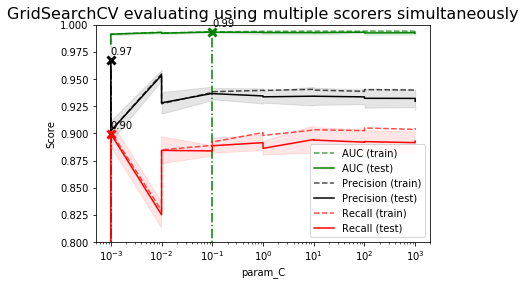

In [90]:
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("param_C")
plt.ylabel("Score")
plt.xscale('log')

ax = plt.gca()
#ax.set_xlim(0, 1000)
ax.set_ylim(0.80, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k', 'r']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))


plt.legend(loc="best")
plt.grid('off')
plt.show()

In [162]:
logistic_report = [['Logistic Regression', grid_lr.best_params_, roc_auc_score(y_lr_train_predict, y_train), roc_auc_score(y_lr_predict, y_test)]]
pd.DataFrame(logistic_report, columns=Titles)

,Model,Best Parameter,ROC_AUC Train Score,ROC_AUC Test Score
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.955012,0.965341


# Linear SVC

In [126]:
scoring = {'AUC': 'roc_auc', 'Recall': 'recall', 'Precision': 'precision'}
Cs = [0.001, 0.01, 0.1, 1, 10]
#gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs}
grid_linear_svc = GridSearchCV(svm.SVC(), param_grid, cv=5, refit='AUC', scoring=scoring)
grid_linear_svc.fit(X_train, y_train)
grid_linear_svc.score(X_train, y_train)

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classifica

0.9893933840142399

In [127]:
grid_linear_svc.score(X_test, y_test)

0.9883297564051265

In [128]:
grid_linear_svc.best_params_

{'C': 1}

In [129]:
grid_linear_svc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
y_linear_svc_predict = grid_linear_svc.predict(X_test)
y_linear_svc_train_predict = grid_linear_svc.predict(X_train)

In [131]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_linear_svc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_linear_svc_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.96 


In [132]:
results = grid_linear_svc.cv_results_
results

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\skl

{'mean_fit_time': array([3.5096128 , 2.03775077, 1.29653311, 0.94329643, 0.88405557]),
 'mean_score_time': array([2.02720385, 1.26563077, 0.75320754, 0.55850925, 0.50245042]),
 'mean_test_AUC': array([0.98723255, 0.98699343, 0.98682587, 0.98829975, 0.98821074]),
 'mean_test_Precision': array([0.        , 0.95583235, 0.91381851, 0.92207639, 0.91575871]),
 'mean_test_Recall': array([0.        , 0.7540292 , 0.86824595, 0.89573482, 0.90568662]),
 'mean_train_AUC': array([0.98726309, 0.9870898 , 0.98726802, 0.98944621, 0.9905914 ]),
 'mean_train_Precision': array([0.        , 0.95611592, 0.91724396, 0.93187204, 0.937343  ]),
 'mean_train_Recall': array([0.        , 0.75616114, 0.86800948, 0.90094787, 0.91445498]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'rank_test_AUC': array([3, 4, 5, 1, 2]),
 

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn

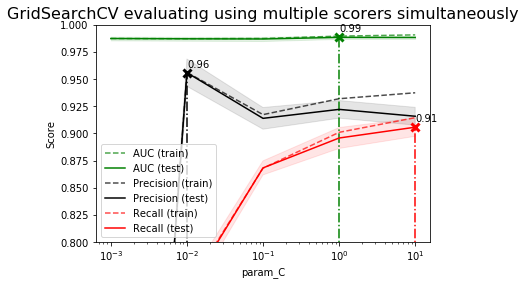

In [133]:
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("param_C")
plt.ylabel("Score")
plt.xscale('log')

ax = plt.gca()
#ax.set_xlim(0, 1000)
ax.set_ylim(0.80, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k', 'r']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))


plt.legend(loc="best")
plt.grid('off')
plt.show()

In [163]:
linear_svc_report = [['Linear SVC', grid_linear_svc.best_params_, roc_auc_score(y_linear_svc_train_predict, y_train), roc_auc_score(y_linear_svc_predict, y_test)]]
pd.DataFrame(linear_svc_report, columns=Titles)

,Model,Best Parameter,ROC_AUC Train Score,ROC_AUC Test Score
0,Linear SVC,{'C': 1},0.954494,0.959877


# Kernelized Support Vector Machine

In [134]:
scoring = {'AUC': 'roc_auc', 'Recall': 'recall', 'Precision': 'precision'}
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_svc = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5, refit='AUC', scoring=scoring)
grid_svc.fit(X_train, y_train)
grid_svc.score(X_train, y_train) 

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\metrics\classifica

0.9928653423318793

In [135]:
grid_svc.score(X_test, y_test)

0.9925934548276405

In [136]:
grid_svc.best_params_

{'C': 10, 'gamma': 0.001}

In [137]:
grid_svc.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
y_svc_predict = grid_svc.predict(X_test)
y_svc_train_predict = grid_svc.predict(X_train)

In [139]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_svc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_svc_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.96 


In [140]:
results = grid_svc.cv_results_
pd.DataFrame(results)

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\skl

,mean_fit_time,mean_score_time,mean_test_AUC,mean_test_Precision,mean_test_Recall,mean_train_AUC,mean_train_Precision,mean_train_Recall,param_C,param_gamma,...,split4_train_Precision,split4_train_Recall,std_fit_time,std_score_time,std_test_AUC,std_test_Precision,std_test_Recall,std_train_AUC,std_train_Precision,std_train_Recall
0,3.098134,1.962552,0.989370,0.000000,0.000000,0.989380,0.000000,0.000000,0.001,0.001,...,0.000000,0.000000,0.118565,0.097353,0.001215,0.000000,0.000000,0.000288,0.000000,0.000000
1,3.111090,1.920843,0.987657,0.000000,0.000000,0.987717,0.000000,0.000000,0.001,0.01,...,0.000000,0.000000,0.017001,0.009459,0.001594,0.000000,0.000000,0.000390,0.000000,0.000000
2,3.053443,1.906509,0.968587,0.000000,0.000000,0.969296,0.000000,0.000000,0.001,0.1,...,0.000000,0.000000,0.020555,0.012950,0.004168,0.000000,0.000000,0.000956,0.000000,0.000000
3,3.137418,1.967931,0.963932,0.000000,0.000000,0.974825,0.000000,0.000000,0.001,1,...,0.000000,0.000000,0.067273,0.020137,0.003441,0.000000,0.000000,0.000255,0.000000,0.000000
4,2.702169,1.691281,0.989847,0.995298,0.407580,0.989886,0.995369,0.407820,0.01,0.001,...,0.995633,0.405213,0.041809,0.031720,0.001260,0.002373,0.024490,0.000288,0.000604,0.007016
5,2.127330,1.313678,0.987600,0.949455,0.761611,0.987671,0.958013,0.761967,0.01,0.01,...,0.959077,0.763626,0.214893,0.087557,0.001583,0.009378,0.013865,0.000380,0.005581,0.002229
6,3.042875,1.830314,0.970134,0.931253,0.440284,0.970941,0.932107,0.442180,0.01,0.1,...,0.929114,0.434834,0.381753,0.084045,0.003907,0.015354,0.018440,0.000926,0.003989,0.005615
7,3.371396,2.007030,0.964063,0.000000,0.000000,0.974787,0.000000,0.000000,0.01,1,...,0.000000,0.000000,0.262894,0.009923,0.003183,0.000000,0.000000,0.000243,0.000000,0.000000
8,1.603716,1.023461,0.990843,0.962940,0.757820,0.990950,0.962897,0.759242,0.1,0.001,...,0.960448,0.762441,0.015161,0.010010,0.001168,0.011553,0.008916,0.000335,0.002623,0.002612
9,1.143748,0.715291,0.987626,0.918031,0.863980,0.987980,0.921819,0.863270,0.1,0.01,...,0.921954,0.860782,0.020061,0.014913,0.001739,0.010999,0.008425,0.000457,0.001940,0.003883


C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn

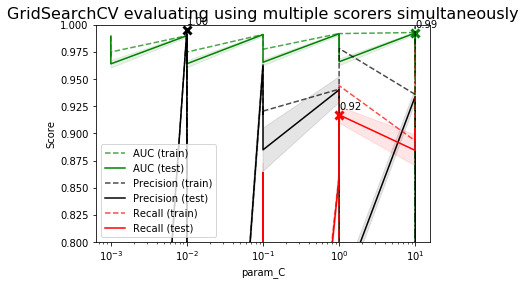

In [141]:
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("param_C")
plt.ylabel("Score")
plt.xscale('log')

ax = plt.gca()
#ax.set_xlim(0, 1000)
ax.set_ylim(0.80, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k', 'r']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))


plt.legend(loc="best")
plt.grid('off')
plt.show()

In [164]:
kernalised_svc_report = [['Kernalised SVC', grid_svc.best_params_, roc_auc_score(y_svc_train_predict, y_train), roc_auc_score(y_svc_predict, y_test)]]
pd.DataFrame(kernalised_svc_report, columns=Titles)

,Model,Best Parameter,ROC_AUC Train Score,ROC_AUC Test Score
0,Kernalised SVC,"{'C': 10, 'gamma': 0.001}",0.955325,0.962619


# Decision Tree

In [146]:
scoring = {'AUC': 'roc_auc', 'Recall': 'recall', 'Precision': 'precision'}
param_grid = {'max_depth':[1,2,3,4,5]}
dtree_grid = GridSearchCV(DecisionTreeClassifier(random_state=6),param_grid=param_grid,cv=5,return_train_score=True, refit='AUC', scoring=scoring)
dtree_grid.fit(X_train,y_train)
dtree_grid.score(X_train,y_train)

0.9901549167458614

In [147]:
dtree_grid.score(X_test,y_test)

0.9842057400603834

In [148]:
pd.DataFrame(dtree_grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_AUC,mean_test_Precision,mean_test_Recall,mean_train_AUC,mean_train_Precision,mean_train_Recall,param_max_depth,params,...,split4_train_Precision,split4_train_Recall,std_fit_time,std_score_time,std_test_AUC,std_test_Precision,std_test_Recall,std_train_AUC,std_train_Precision,std_train_Recall
0,0.039694,0.003589,0.950184,0.879938,0.932229,0.951605,0.881943,0.934479,1,{'max_depth': 1},...,0.878754,0.936019,0.003242,0.000799,0.003060,0.011814,0.008815,0.001476,0.003265,0.003940
1,0.059241,0.003591,0.972541,0.890077,0.917060,0.977710,0.894765,0.922986,2,{'max_depth': 2},...,0.878754,0.936019,0.000489,0.000489,0.001932,0.017971,0.027186,0.001591,0.027650,0.024572
2,0.083377,0.003391,0.980997,0.915465,0.897158,0.986824,0.931361,0.908175,3,{'max_depth': 3},...,0.947970,0.885071,0.002239,0.000489,0.003742,0.023897,0.017897,0.002471,0.013566,0.017914
3,0.104919,0.003391,0.982145,0.909351,0.909953,0.989175,0.928838,0.924289,4,{'max_depth': 4},...,0.928486,0.922986,0.000977,0.000489,0.003232,0.014134,0.008344,0.001495,0.004416,0.003955
4,0.130457,0.003592,0.980480,0.906486,0.901897,0.991495,0.935977,0.938626,5,{'max_depth': 5},...,0.939593,0.930687,0.001471,0.000487,0.005423,0.020314,0.015402,0.001587,0.007246,0.009586


In [149]:
dtree_grid.best_params_

{'max_depth': 4}

In [155]:
dtree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6,
            splitter='best')

In [156]:
y_dtree_predict = dtree_grid.predict(X_test)
y_dtree_train_predict = dtree_grid.predict(X_train)

In [158]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_dtree_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_dtree_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


In [150]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

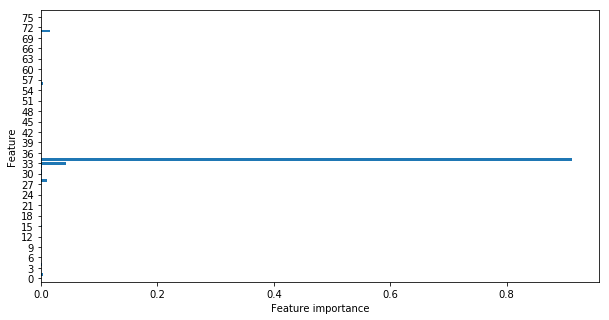

In [151]:
%matplotlib inline
def plot_feature_importances(model):
    n_features = X_train.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(0,n_features,3))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.figure(figsize=(10,5))
plot_feature_importances(dtree)

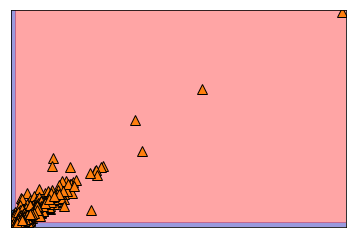

In [153]:
x=X_train[:,[33,34]]
dtree1=DecisionTreeClassifier(max_depth=3)
dtree1.fit(x,y_train)
mglearn.plots.plot_2d_separator(dtree1, x, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y_train)

In [166]:
dtree_report = [['Decision Tree', dtree_grid.best_params_, roc_auc_score(y_dtree_train_predict, y_train), roc_auc_score(y_dtree_predict, y_test)]]
pd.DataFrame(dtree_report, columns=Titles)

,Model,Best Parameter,ROC_AUC Train Score,ROC_AUC Test Score
0,Decision Tree,{'max_depth': 4},0.950101,0.945578


In [168]:
Final_Report = pd.DataFrame(knn_report+logistic_report+linear_svc_report+kernalised_svc_report+dtree_report, columns=Titles, index=range(1,6))
Final_Report

,Model,Best Parameter,ROC_AUC Train Score,ROC_AUC Test Score
1,KNN,{'n_neighbors': 40},0.951486,0.960395
2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.955012,0.965341
3,Linear SVC,{'C': 1},0.954494,0.959877
4,Kernalised SVC,"{'C': 10, 'gamma': 0.001}",0.955325,0.962619
5,Decision Tree,{'max_depth': 4},0.950101,0.945578


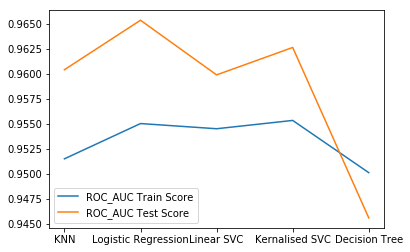

In [173]:
plt.plot(Final_Report.iloc[:,0],Final_Report.iloc[:,2],label='ROC_AUC Train Score')
plt.plot(Final_Report.iloc[:,0],Final_Report.iloc[:,3],label='ROC_AUC Test Score')
plt.legend()

### From the above plot, we can see that logistic regression is the model which gives us the best ROC_AUC test scores. 
### We will proceed to use the best parameters {'C': 0.1, 'penalty': 'l1'} found here on the whole data set

In [175]:
Full_X = df.iloc[:,:77]
Full_y = df[77]

In [176]:
Full_X_train_org, Full_X_test_org, Full_y_train, Full_y_test = train_test_split(Full_X,Full_y,random_state=6)
sc = StandardScaler()
Full_X_train = sc.fit_transform(Full_X_train_org)
Full_X_test = sc.transform(Full_X_test_org)

In [187]:
full_logistic = linear_model.LogisticRegression(C=0.1,penalty='l1')
full_logistic.fit(Full_X_train,Full_y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
full_logistic.score(Full_X_train,Full_y_train)

0.9659622856059888

In [189]:
full_logistic.score(Full_X_test,Full_y_test)

0.9662279330244193

In [196]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
logreg = linear_model.LogisticRegression()
kfold = KFold(n_splits=5)

In [200]:
cv_train_scores = cross_val_score(logreg, Full_X_train,Full_y_train, cv=kfold)
cv_test_scores = cross_val_score(logreg, Full_X_test,Full_y_test, cv=kfold)

In [204]:
print('Cross validation train score is : {0}\nCross validation test score is : {1}'.format(round(cv_train_scores.mean(),5), round(cv_test_scores.mean(),5)))

Cross validation train score is : 0.96596
Cross validation test score is : 0.96543
